In [1]:
import math
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf

In [2]:

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into training set and a randomly slected small validation set 
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.466], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]] 


#Part 1 output data: VL (V) and Power out (W)
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]] 

In [3]:
import statistics

temps, ids, loads = [], [], []
for t, i ,l in xdata:
    temps.append(t)
    ids.append(i)
    loads.append(l)

t_med = statistics.median(temps)
id_med = statistics.median(ids)
load_med = statistics.median(loads)

print(t_med, id_med, load_med)

watts, volts = [], []
for v, w in ydata:
    watts.append(w)
    volts.append(v)

v_med = statistics.median(volts)
w_med = statistics.median(watts)

print(v_med, w_med)

10.0 800.0 6.696
26.45 100.1


In [4]:
'''>>>>> start CodeP3.1.1F24
    V.P. Carey ME249, Fall 2024

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages

#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables - add your values here
Tamed = t_med  #make sure Tamed does not = 0
IDmed = id_med
RLmed = load_med

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
# X data imported above

for i, dp in enumerate(xdata):
    t, id, lr = dp
    xdata[i] = [t/Tamed, id/IDmed, lr/RLmed]

xarray= np.array(xdata)
print (xdata)
print (xarray)

# define meadian values of output variables - add your values here
VLmed = v_med
Wdmed = w_med

#Part 1 output data: VL (V) and Power out Wd (W)
# ydata imported above

for i, dp in enumerate(ydata):
    v, w = dp
    ydata[i] = [v/VLmed, w/Wdmed]

yarray= np.array(ydata)
print (ydata)
print (yarray)

[[-1.0, 0.4375, 0.6666666666666667], [-1.0, 0.8125, 0.6666666666666667], [-1.0, 1.1875, 0.6666666666666667], [-1.0, 1.5625, 0.6666666666666667], [1.0, 0.4375, 0.6666666666666667], [1.0, 0.8125, 0.6666666666666667], [1.0, 1.1875, 0.6666666666666667], [1.0, 1.5625, 0.6666666666666667], [3.0, 0.4375, 0.6666666666666667], [3.0, 0.8125, 0.6666666666666667], [3.0, 1.1875, 0.6666666666666667], [3.0, 1.5625, 0.6669653524492235], [-1.0, 0.4375, 1.0], [-1.0, 0.8125, 1.0], [-1.0, 1.1875, 1.0], [-1.0, 1.5625, 1.0], [1.0, 0.4375, 1.0], [1.0, 0.8125, 1.0], [1.0, 1.1875, 1.0], [1.0, 1.5625, 1.0], [3.0, 0.4375, 1.0], [3.0, 0.8125, 1.0], [3.0, 1.1875, 1.0], [3.0, 1.5625, 1.0], [-1.0, 0.4375, 1.3333333333333335], [-1.0, 0.8125, 1.3333333333333335], [-1.0, 1.1875, 1.3333333333333335], [-1.0, 1.5625, 1.3333333333333335], [1.0, 0.4375, 1.3333333333333335], [1.0, 0.8125, 1.3333333333333335], [1.0, 1.1875, 1.3333333333333335], [1.0, 1.5625, 1.3333333333333335], [3.0, 0.4375, 1.3333333333333335], [3.0, 0.8125

In [5]:
# separate into training and validation
import random

data_count = len(xdata)
randomizer_array = list(range(data_count))
random.shuffle(randomizer_array)

test_count = data_count//3
train_count = data_count - test_count

train_indices = randomizer_array[:train_count]
test_indices = randomizer_array[train_count:]

print(train_indices)
print(test_indices)

train_x_data = [xdata[i] for i in train_indices]
train_y_data = [ydata[i] for i in train_indices]

test_x_data = [xdata[i] for i in test_indices]
test_y_data = [ydata[i] for i in test_indices]

[2, 16, 34, 1, 14, 20, 23, 29, 13, 18, 35, 4, 32, 17, 25, 12, 9, 21, 30, 33, 7, 27, 19, 0]
[31, 24, 3, 22, 28, 11, 10, 26, 8, 6, 15, 5]


In [17]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(9, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(13, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(7, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


/opt/anaconda3/envs/python3-10_keras_env/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [20]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.010)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [21]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(train_x_data,train_y_data,epochs=800,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/800
1/1 [==============================] - 0s 193ms/step - loss: 0.0729
Epoch 2/800
1/1 [==============================] - 0s 3ms/step - loss: 0.1164
Epoch 3/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 4/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0643
Epoch 5/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 6/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 7/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 8/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 9/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 10/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 11/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 12/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 13/800
1/1 [==============================] - 0s 3ms/

In [22]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.


predictions = recon_model.predict(train_x_data)




/opt/anaconda3/envs/python3-10_keras_env/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 0s 114ms/step


In [23]:
pv, pw = [], []
rv, rw = [], []

abs_err = 0
for pred, real in zip(predictions, train_y_data):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err += abs(real_w - pred_w)
    pv.append(pv)
    pw.append(pred_w)
    rv.append(real_v)
    rw.append(real_w)

mean_abs_err = abs_err/len(pw)
print(mean_abs_err)

0.04026666000520153


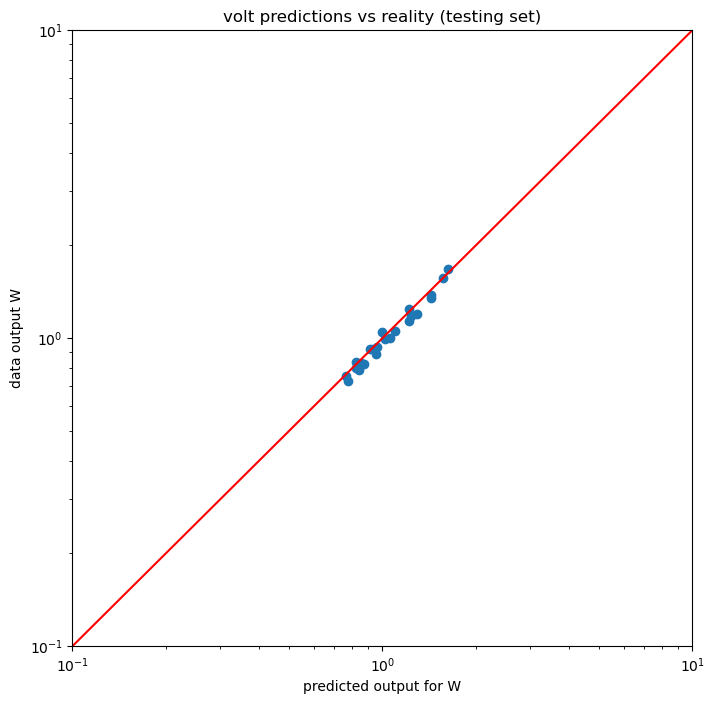

In [24]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw, rw)
plt.title('volt predictions vs reality (training set)')
plt.xlabel('predicted output for W') 
plt.ylabel('data output W')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()

In [25]:
predictions = recon_model.predict(test_x_data)

1/1 [==============================] - 0s 20ms/step


In [26]:

pv, pw = [], []
rv, rw = [], []

abs_err = 0
for pred, real in zip(predictions, test_y_data):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err += abs(real_w - pred_w)
    pv.append(pv)
    pw.append(pred_w)
    rv.append(real_v)
    rw.append(real_w)

mean_abs_err = abs_err/len(pw)
print(mean_abs_err)

0.09925268729388852


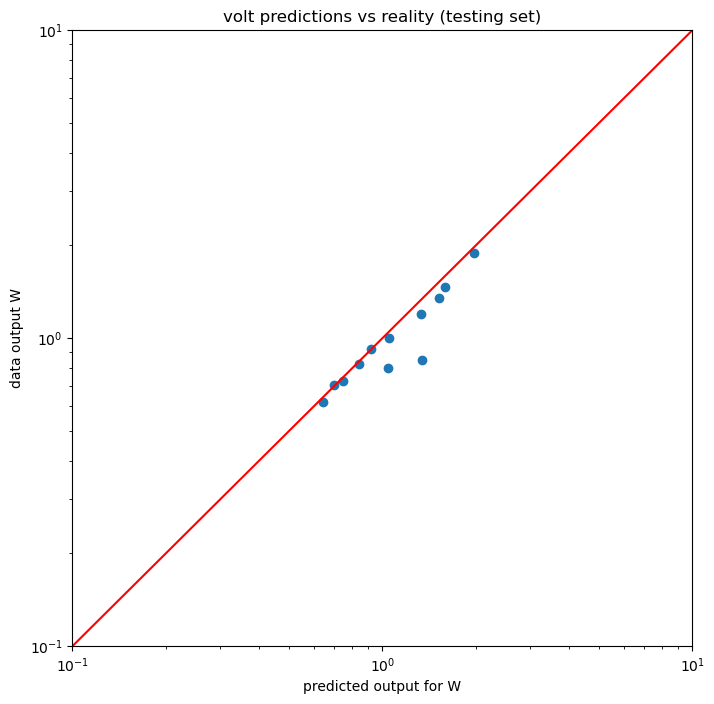

In [43]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw, rw)
plt.title('volt predictions vs reality (testing set)')
plt.xlabel('predicted output for W') 
plt.ylabel('data output W')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()

In [27]:
#Part 1 input HI FLUX DATA: Air temp (degC), ID (W/sqm), load resistance (ohms)

hi_xdata = [[-10.0, 1550, 4.464],  
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.695], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.698], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928]]
 
#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
hi_ydata = [[26.1, 152.8], 
 [26.5, 172.7], 
 [27.9, 191.4], 
 [28.3, 198.0], 
 [29.6, 217.8], 
 [30.1, 224.4],  
 [26.9, 118.8], 
 [27.2, 122.1], 
 [28.8, 136.4], 
 [29.1, 139.6], 
 [30.6, 154.0], 
 [31.0, 158.4],  
 [27.3, 92.4], 
 [27.6, 94.6], 
 [29.2, 105.6], 
 [29.6, 107.8], 
 [31.1, 119.9], 
 [31.5, 123.2]]

for i, dp in enumerate(hi_xdata):
    t, id, lr = dp
    hi_xdata[i] = [t/Tamed, id/IDmed, lr/RLmed]

for i, dp in enumerate(hi_ydata):
    v, w = dp
    hi_ydata[i] = [v/VLmed, w/Wdmed]

In [28]:
hiflux_predictions = recon_model.predict(hi_xdata)

1/1 [==============================] - 0s 21ms/step


In [29]:
pv, pw = [], []
rv, rw = [], []

abs_err = 0
for pred, real in zip(hiflux_predictions, hi_ydata):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err += abs(real_w - pred_w)
    pv.append(pv)
    pw.append(pred_w)
    rv.append(real_v)
    rw.append(real_w)

mean_abs_err = abs_err/len(pw)
print(mean_abs_err)

0.21116728042111255


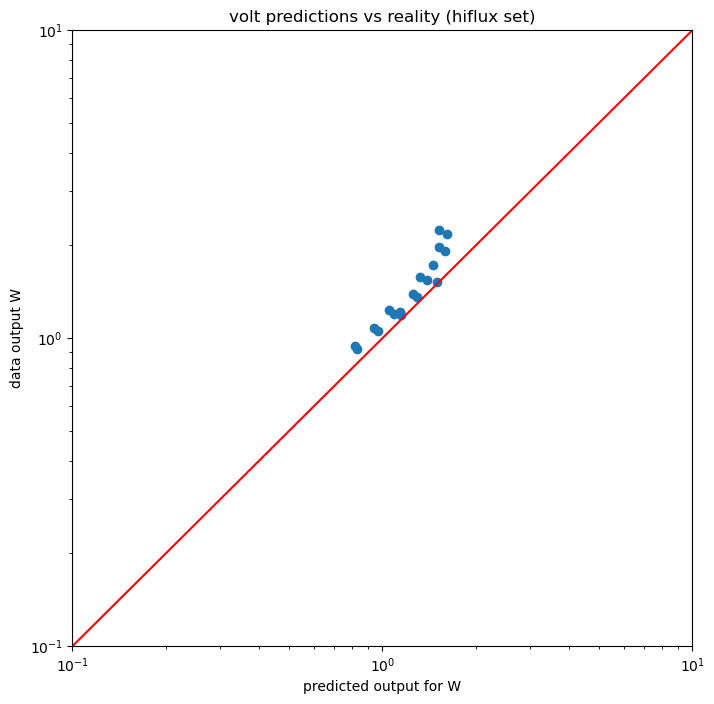

In [30]:
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw, rw)
plt.title('volt predictions vs reality (hiflux set)')
plt.xlabel('predicted output for W') 
plt.ylabel('data output W')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()

In [31]:
# create surface map

temp = 20
inputs = []
for load_res in range(4, 9):
    for id in range(500, 1801, 50):
        inputs.append([temp/Tamed, id/IDmed, load_res/RLmed]) 

outputs = recon_model.predict(inputs)



5/5 [==============================] - 0s 514us/step


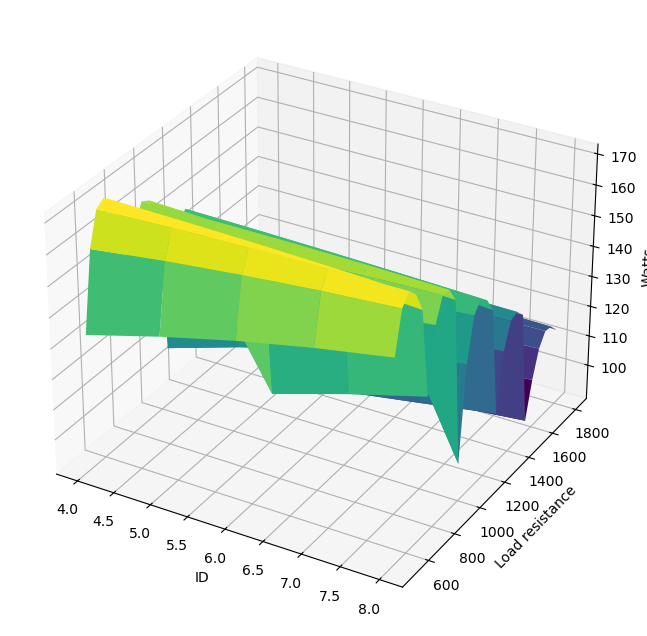

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x and y arrays based on your loop ranges
x = np.arange(4, 9)               # load_res from 4 to 8
y = np.arange(500, 1801, 50)      # id from 500 to 1800 with a step of 50

# Create a meshgrid
X, Y = np.meshgrid(x, y)

out_watts = [o[1] * Wdmed for o in outputs]

Z = np.array(out_watts).reshape(Y.shape[0], X.shape[1])

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('ID')
ax.set_ylabel('Load resistance')
ax.set_zlabel('Watts')

plt.show()